# CONNECTTEL Telecommunication Company - Customer Churn Prediction




PROBLEM STATEMENT:

ConnectTel Telecom Company is confronted with the critical challenge of customer churn, impacting business sustainability and growth. Current customer retention strategies have proven ineffective, leading to the loss of valuable customers to competitors.

MY ROLE:

I have been contacted to build a machine learning model that will predict customer churn. Leveraging advanced analytics and machine learning techniques on available customer data, the goal is to accurately forecast customer churn, allowing for targeted retention initiatives.

OBJECTIVES:

. Develop a robust customer churn prediction system.

. Enhance customer loyalty and reduce customer attrition.

. Maintain a competitive edge in the telecommunications industry.

In [70]:
# Importing necessary libraries

# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for missing value visualization
import missingno as msno

from collections import Counter

# for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# classfiers libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# bringing in the dataset

df = pd.read_csv(r"C:\Users\seunt\OneDrive\CAPSTONE PROJECT CUSTOMER CHURN\Customer-Churn.csv")

df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# converting 'TotalCharges' from object to float

df['TotalCharges'] = df['TotalCharges'].str.strip().replace('',np.nan).astype(float)

In [6]:
# confirming if the data type of 'TotalCharges' has been changed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.describe(exclude = np.number)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [9]:
# checking for missing values/data

df.isnull().mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

#### Observation
There are missing values for the feature 'TotalCharges'.

In [10]:
# checking for duplicates

df.duplicated().sum()

0

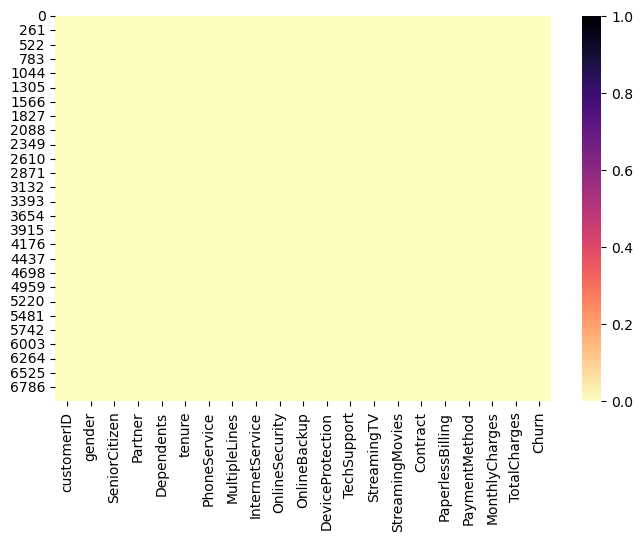

In [11]:
# visualizing the missing values in 'TotalCharges'

plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r');

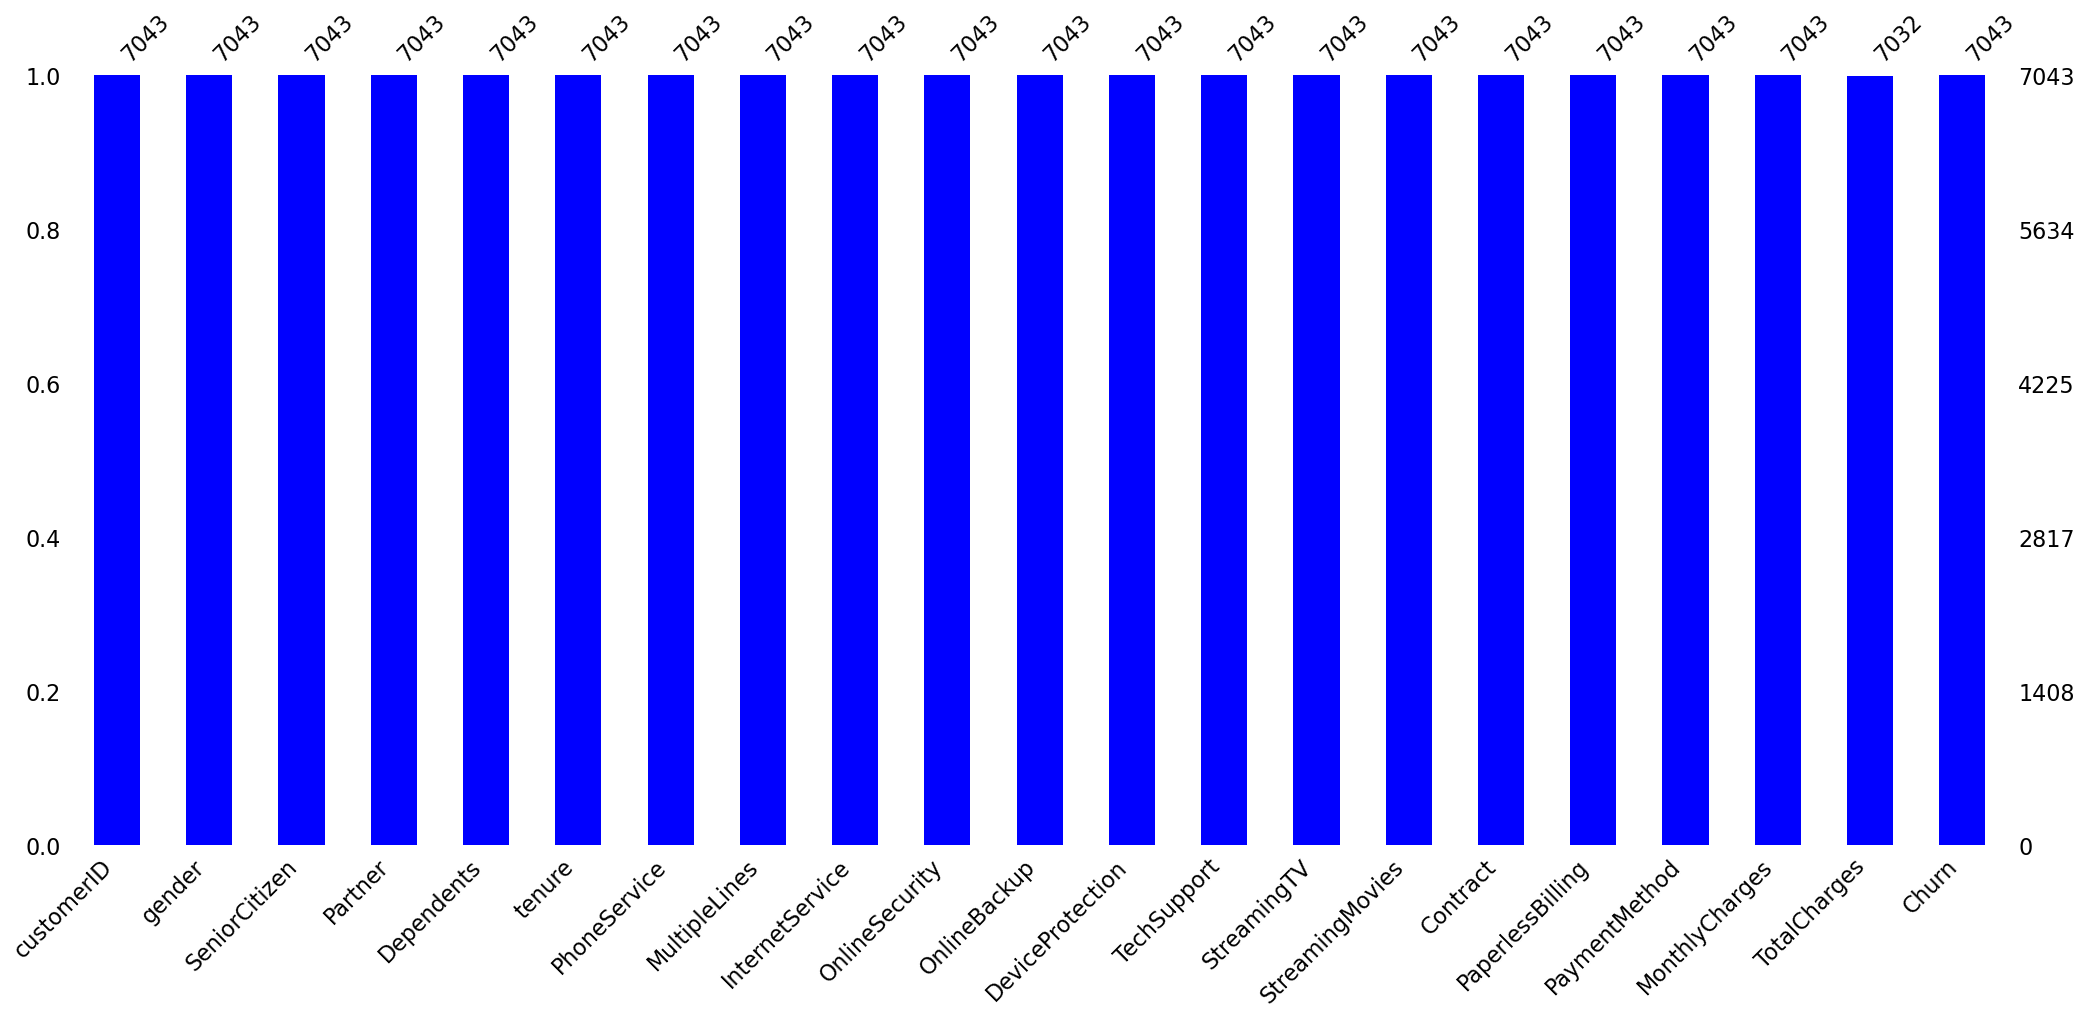

In [12]:
# visualizing the missing values in 'TotalCharges'

msno.bar(df, color = 'blue');

In [13]:
# The percentage of the missing values is 0.16% which is less than 1%. Therefore, i will be droping the missing values.

df.dropna(inplace = True)

In [14]:
# Confirming if the missing values has been dropped

df.isnull().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

#### Observation
The missing values have been dropped.

In [15]:
df.shape

(7032, 21)

## Data Analysis

### Univariate Analysis

Male      3549
Female    3483
Name: gender, dtype: int64


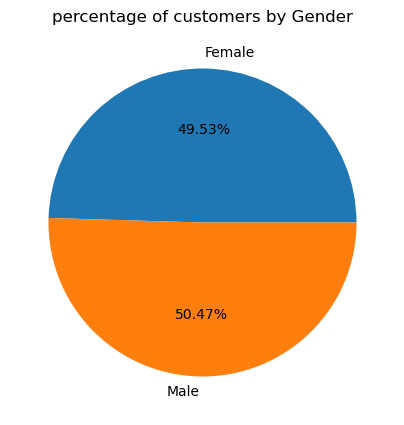

In [147]:
# percentage of customers by Gender

print(df['gender'].value_counts())

fig, ax = plt.subplots(figsize = (5,5))
count = Counter(df['gender'])
ax.pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
ax.set_title('percentage of customers by Gender');

#### Observation
The customer base is nearly evenly split between male and female customers, with a slightly higher percentage being male.

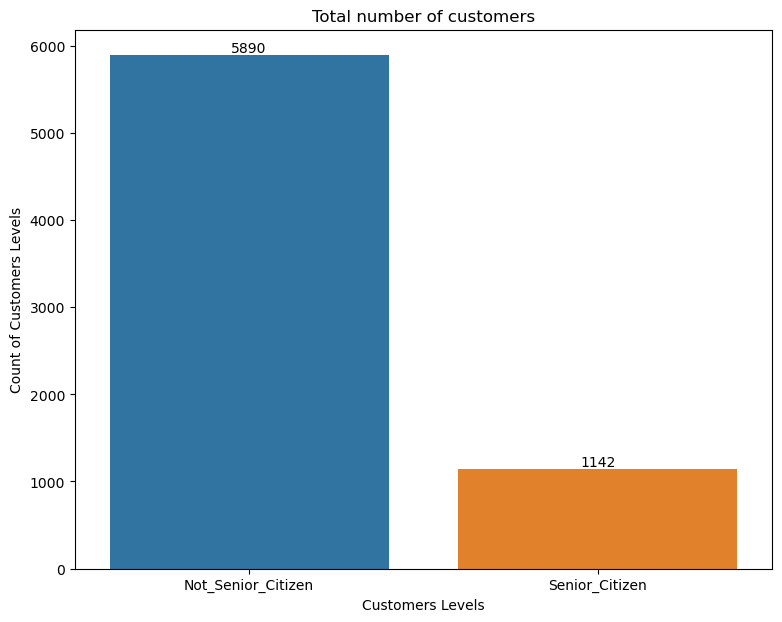

In [146]:
# Total number of customers 

def Senior_Citizen(sc):
    if sc == 1:
        return 'Senior_Citizen'
    else:
        return 'Not_Senior_Citizen'
    
df['Senior_Citizen'] = df['SeniorCitizen'].apply(Senior_Citizen)

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Total number of customers')
axs = sns.countplot(x = 'Senior_Citizen', data = df)
values = df['Senior_Citizen'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('Customers Levels')
plt.ylabel('Count of Customers Levels');

#### Observation
The majority of the customer base consists of non-senior citizens, with a smaller subset being senior customers.

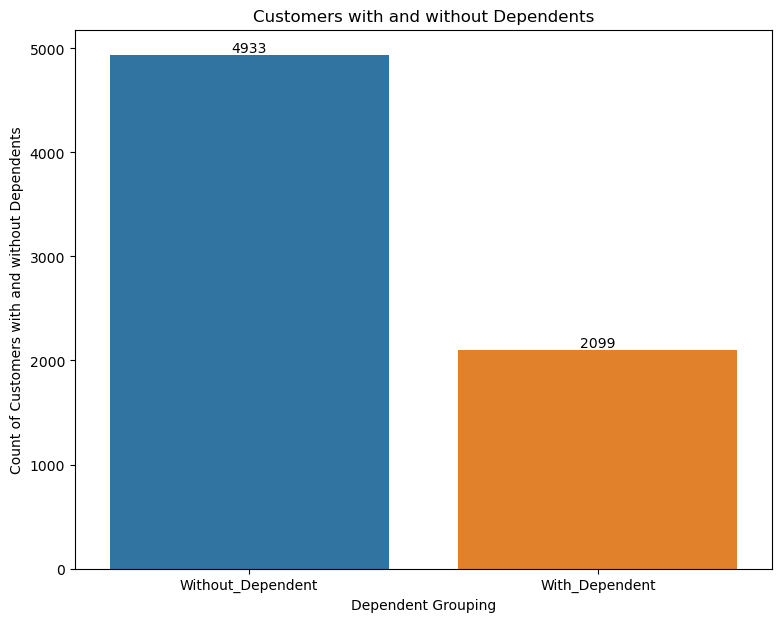

In [145]:
# Count of customers with and without Dependents

def Dependant_group(dp):
    if dp == 'Yes':
        return 'With_Dependent'
    else:
        return 'Without_Dependent'
    
df['Dependents_group'] = df['Dependents'].apply(Dependant_group)


fig, axs = plt.subplots(figsize = (9,7))
plt.title('Customers with and without Dependents')
axs = sns.countplot(x = 'Dependents_group', data = df)
values = df['Dependents_group'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('Dependent Grouping')
plt.ylabel('Count of Customers with and without Dependents');

#### Observation
A substantial portion of the customer base consists of individuals with dependents, while a notable number of customers do not have dependents.

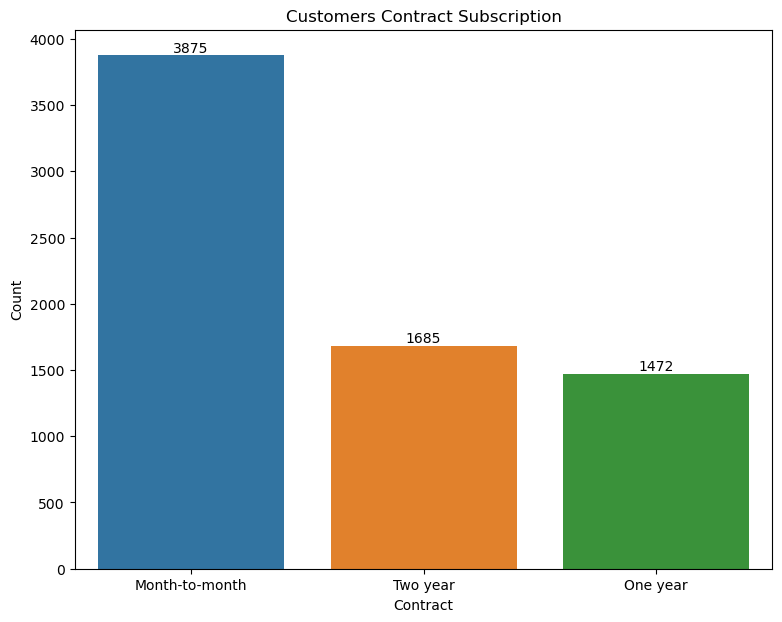

In [144]:
# Number of customers on a particular contract

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Customers Contract Subscription')
axs = sns.countplot(x = 'Contract', data = df, order=df['Contract'].value_counts().index)
values = df['Contract'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('Contract')
plt.ylabel('Count');

#### Observation
A significant portion of the customer base is on monthly contracts, while a notable number have chosen longer-term contracts.

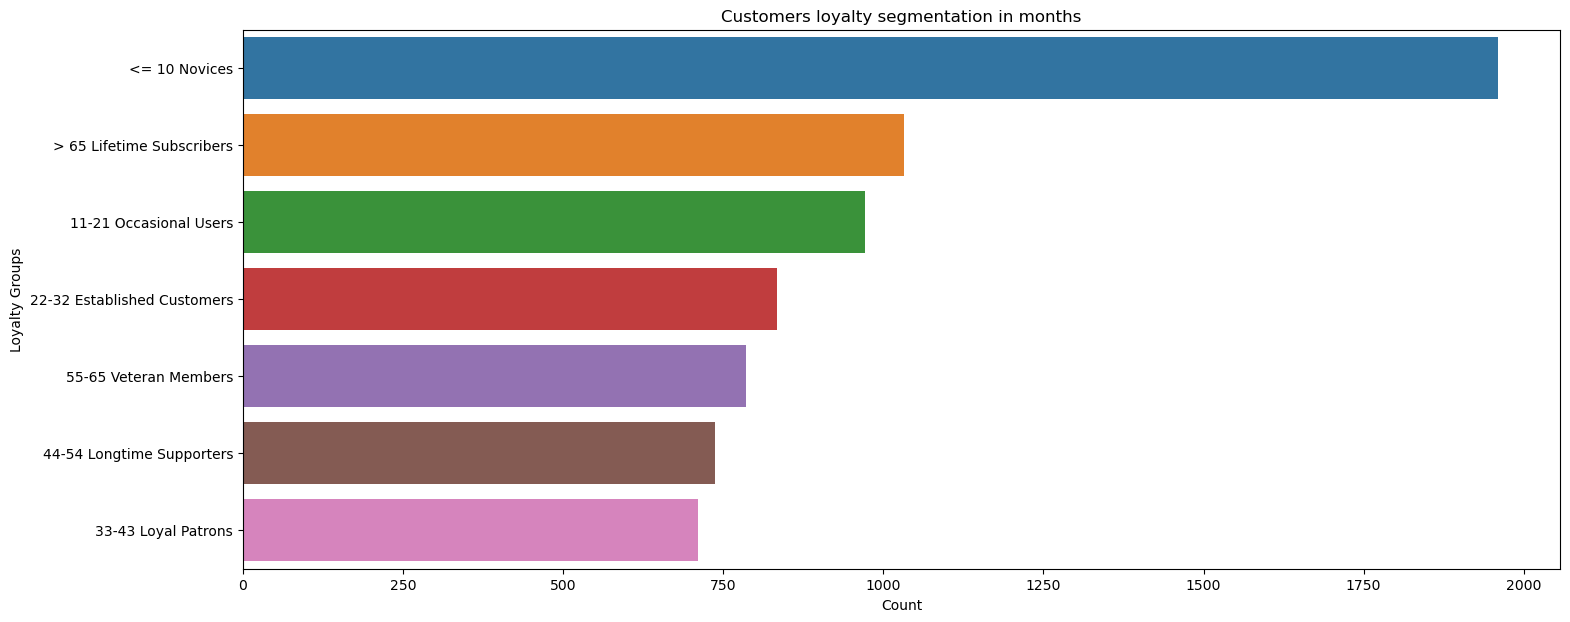

In [143]:
# Grouping the tenure(monthly) into buckets to know the categories of the customers.

def customer_loyalty(t):
    if t <= 10:
        return '<= 10 Novices'
    elif t <= 21:
        return '11-21 Occasional Users'
    elif t <= 32:
        return '22-32 Established Customers'
    elif t <= 43:
        return '33-43 Loyal Patrons'
    elif t <= 54:
        return '44-54 Longtime Supporters'
    elif t <= 65:
        return '55-65 Veteran Members'
    else:
        return '> 65 Lifetime Subscribers'
    
df['customer_loyalty'] = df['tenure'].apply(customer_loyalty)

fig, axs = plt.subplots(figsize = (17,7))
plt.title('Customers loyalty segmentation in months')
axs = sns.countplot(y = 'customer_loyalty', data = df, order=df['customer_loyalty'].value_counts().index)
order = df['customer_loyalty'].sort_values(ascending = False).index
plt.ylabel('Loyalty Groups')
plt.xlabel('Count');

#### Observation
The majority of the customers fall into the novice category, indicating that they are relatively new subscribers to the service.

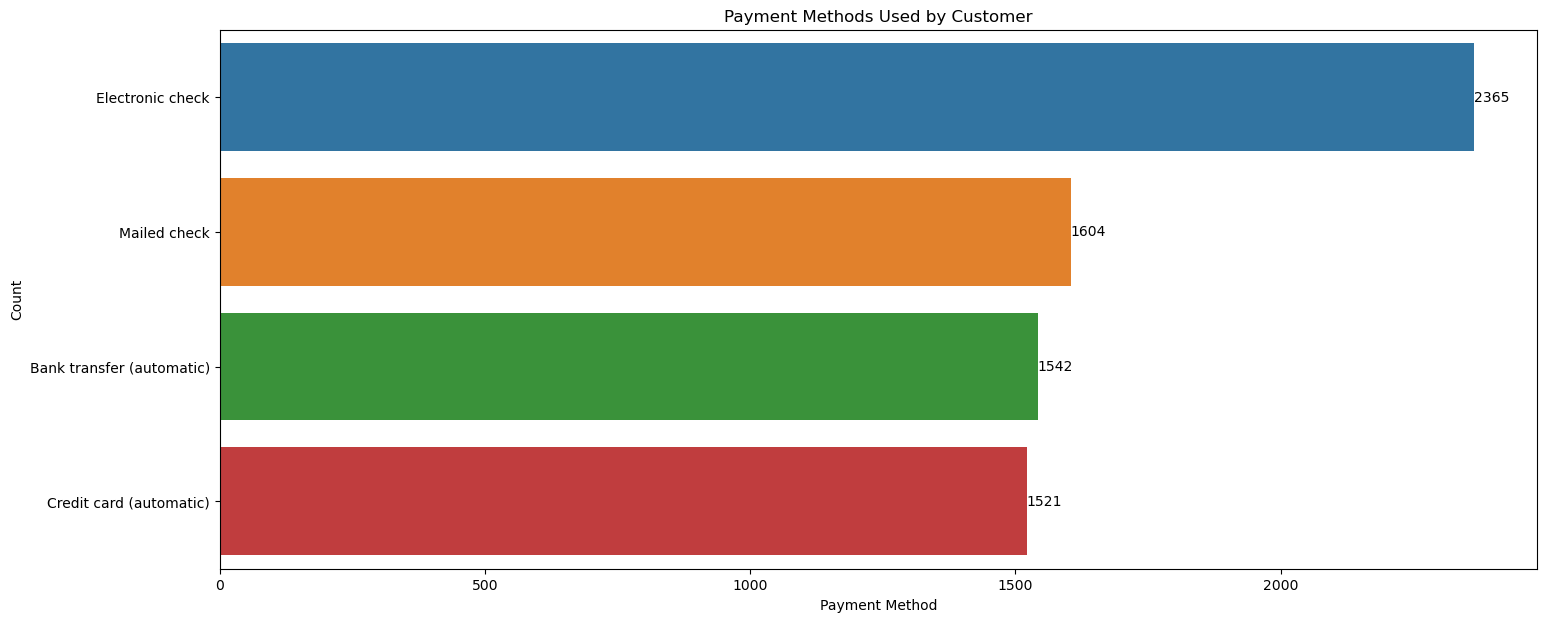

In [142]:
# Payment Method used by the customers.

fig, axs = plt.subplots(figsize = (17,7))
plt.title('Payment Methods Used by Customer')
axs = sns.countplot(y = 'PaymentMethod', data = df)
values = df['PaymentMethod'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('Payment Method')
plt.ylabel('Count');

#### Observation
A diverse range of payment methods is used by the customers, with electronic check being the most popular, followed by mailed check, bank transfer, and credit card.

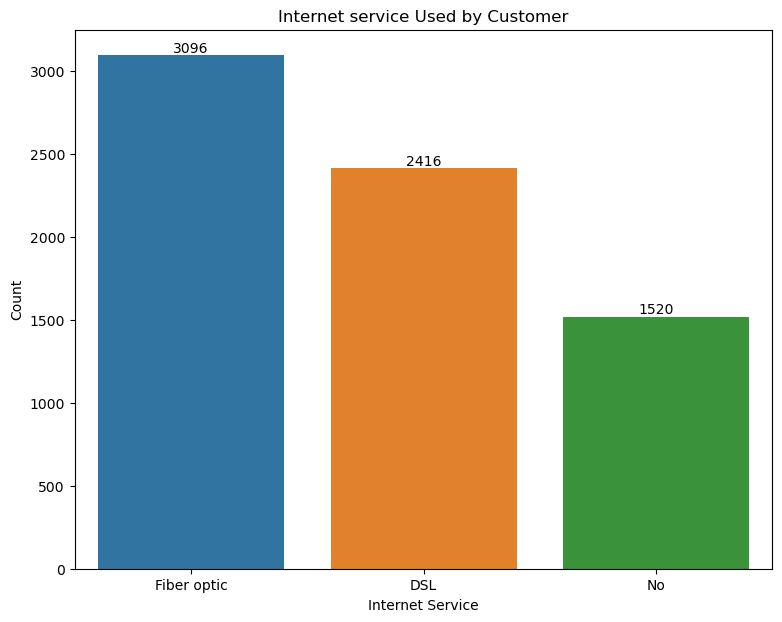

In [141]:
# Internet Service used by the customers.

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Internet service Used by Customer')
axs = sns.countplot(x = 'InternetService', data = df, order=df['InternetService'].value_counts().index)
values = df['InternetService'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('Internet Service')
plt.ylabel('Count');

#### Observation
Majority of the customers use 'Fiber optic' payment method.

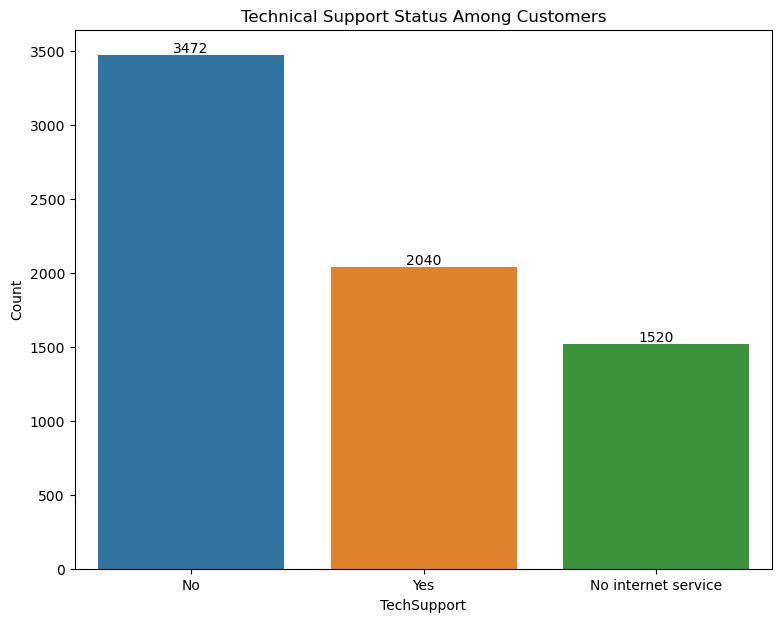

In [139]:
# Count of customers with and without Technical Support.

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Technical Support Status Among Customers')
axs = sns.countplot(x = 'TechSupport', data = df, order=df['TechSupport'].value_counts().index)
values = df['TechSupport'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('TechSupport')
plt.ylabel('Count');

#### Observation
A significant portion of the customer base does not have technica support services, and a notable segment also lacks internet service.

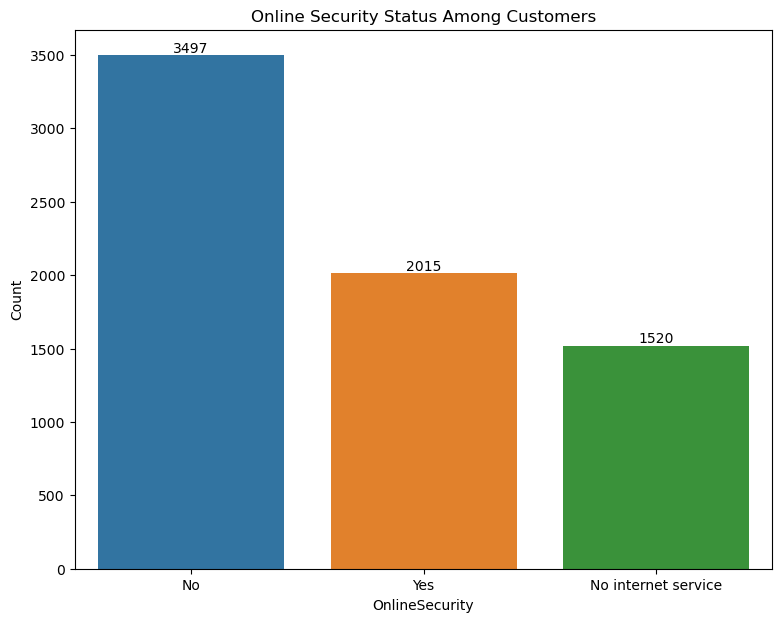

In [138]:
# Count of customers with and without OnlineS ecurity.

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Online Security Status Among Customers')
axs = sns.countplot(x = 'OnlineSecurity', data = df, order=df['OnlineSecurity'].value_counts().index)
values = df['OnlineSecurity'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('OnlineSecurity')
plt.ylabel('Count');

#### Observation
A substantial number of customers have online security services, while a notable portion of the customer base does not have online security, and a significant segment lacks internet service.

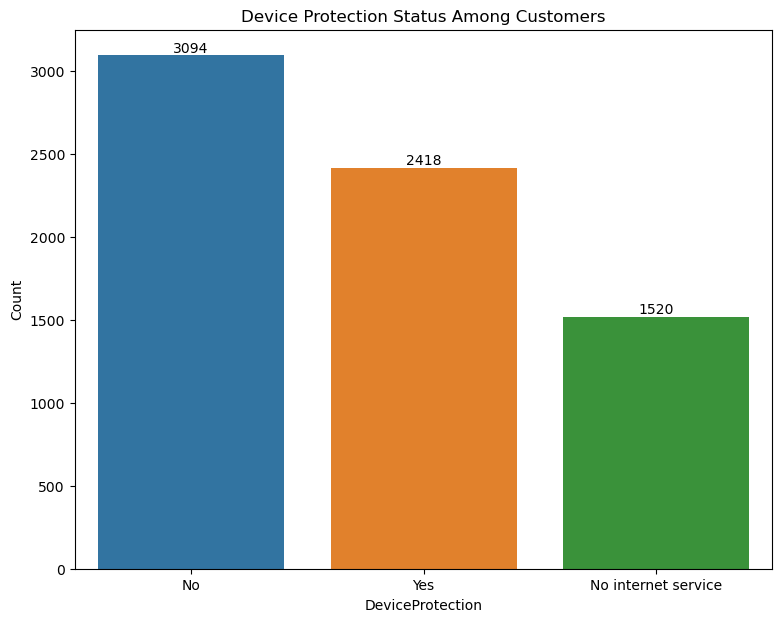

In [135]:
# Count of customers with and without Device Protection.

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Device Protection Status Among Customers')
axs = sns.countplot(x = 'DeviceProtection', data = df, order=df['DeviceProtection'].value_counts().index)
values = df['DeviceProtection'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('DeviceProtection')
plt.ylabel('Count');

#### Observation
A significant portion of the customer base has device protection services, while another group does not have device protection. Additionally, there is a notable segment of customers without internet service.

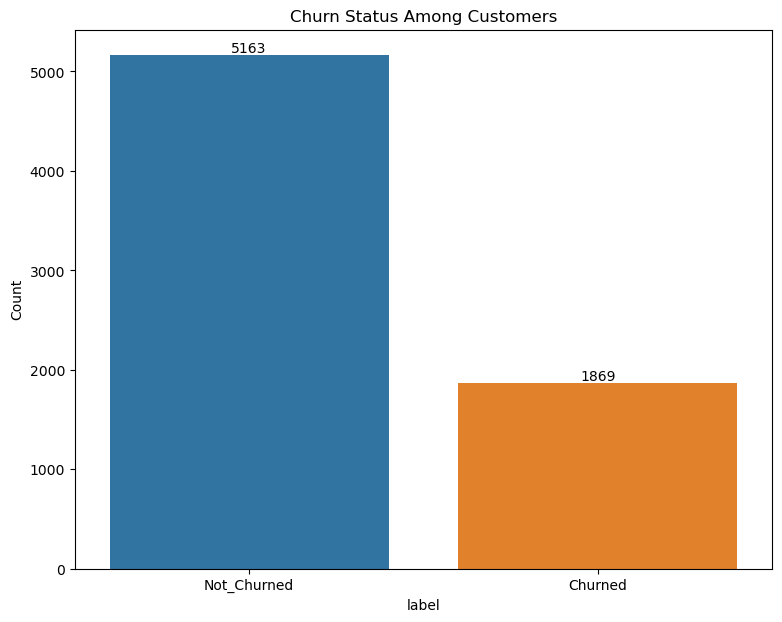

In [148]:
def label(lb):
    if lb == 'Yes':
        return 'Churned'
    else:
        return 'Not_Churned'
    
df['label'] = df['Churn'].apply(label)

fig, axs = plt.subplots(figsize = (9,7))
plt.title('Churn Status Among Customers')
axs = sns.countplot(x = 'label', data = df, order=df['label'].value_counts().index)
values = df['label'].value_counts(ascending = False).values
axs.bar_label(container = axs.containers[0], labels = values)
plt.xlabel('label')
plt.ylabel('Count');

#### Observation
The majority of the customer base has shown loyalty by not churning, with a smaller subset choosing to churn.

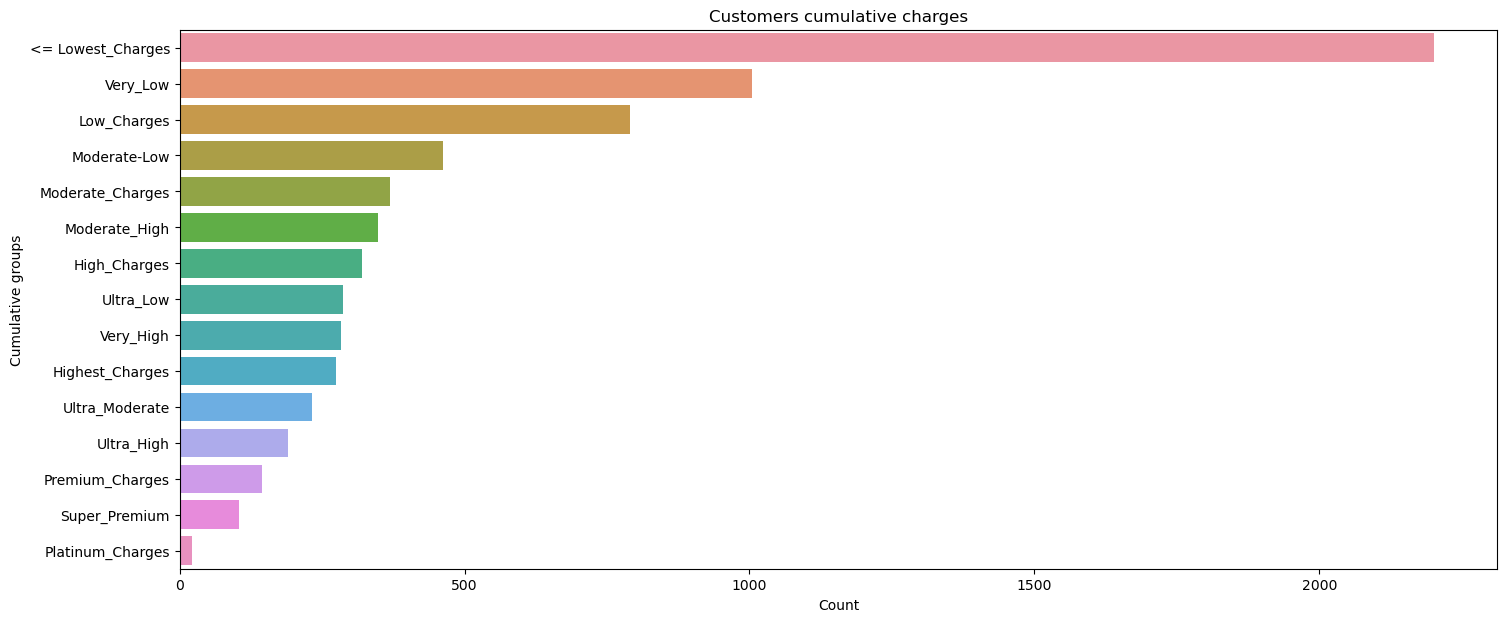

In [26]:
def Cumulative_Charges(x):
    if x <= 600:
        return '<= Lowest_Charges'
    elif x <= 1200:
        return 'Very_Low'
    elif x <= 1800:
        return 'Low_Charges'
    elif x <= 2400:
        return 'Moderate-Low'
    elif x <= 3000:
        return 'Moderate_Charges'
    elif x <= 3600:
        return 'Moderate_High'
    elif x <= 4200:
        return 'High_Charges'
    elif x <= 4800:
        return 'Very_High'
    elif x <= 5400:
        return 'Highest_Charges'
    elif x <= 6000:
        return 'Ultra_Low'
    elif x <= 6600:
        return 'Ultra_Moderate'
    elif x <= 7200:
        return 'Ultra_High'
    elif x <= 7800:
        return 'Premium_Charges'
    elif x <= 8400:
        return 'Super_Premium'
    else:
        return 'Platinum_Charges'
    
df['Cumulative_Charges'] = df['TotalCharges'].apply(Cumulative_Charges)

fig, axs = plt.subplots(figsize = (17,7))
plt.title('Customers cumulative charges')
axs = sns.countplot(y = 'Cumulative_Charges', data = df, order=df['Cumulative_Charges'].value_counts().index)
order = df['Cumulative_Charges'].sort_values(ascending = False).index
plt.ylabel('Cumulative groups')
plt.xlabel('Count');

#### Observation
The majority of customers or subscribers predominantly belong to the "Lowest Charges" category.

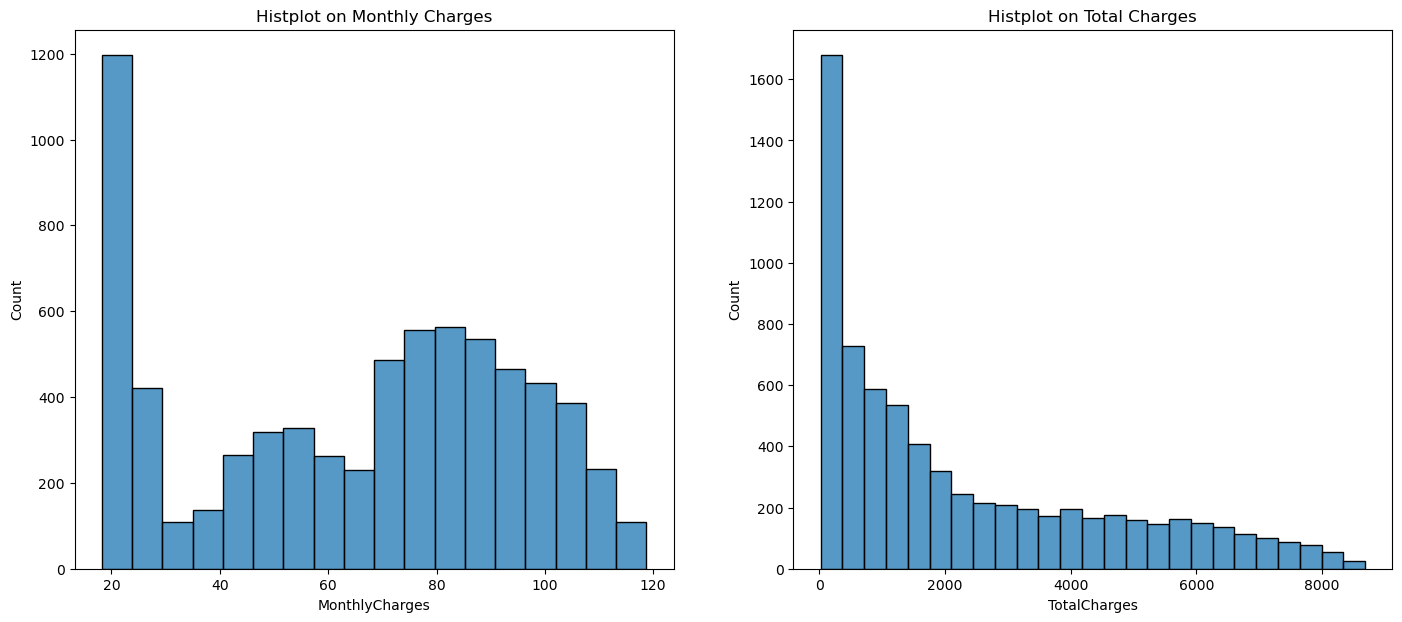

In [149]:
# Distribution of Monthly and Total Charges Among Customers

fig, axs = plt.subplots(figsize = (17,7), nrows = 1, ncols = 2)

sns.histplot(x = 'MonthlyCharges', data = df, ax = axs[0])
axs[0].set_title('Histplot on Monthly Charges')

sns.histplot(x = 'TotalCharges', data = df, ax = axs[1])
axs[1].set_title('Histplot on Total Charges');


#### Observation
The distribution plots of both monthly charges and total charges reveal a right-skewed pattern. For monthly charges, the majority of customers have lower monthly expenses, with a smaller proportion incurring higher charges. In the case of total charges, a similar pattern is observed, with most customers accumulating lower cumulative expenses over their tenure with the company.

### Bivariate Analysis

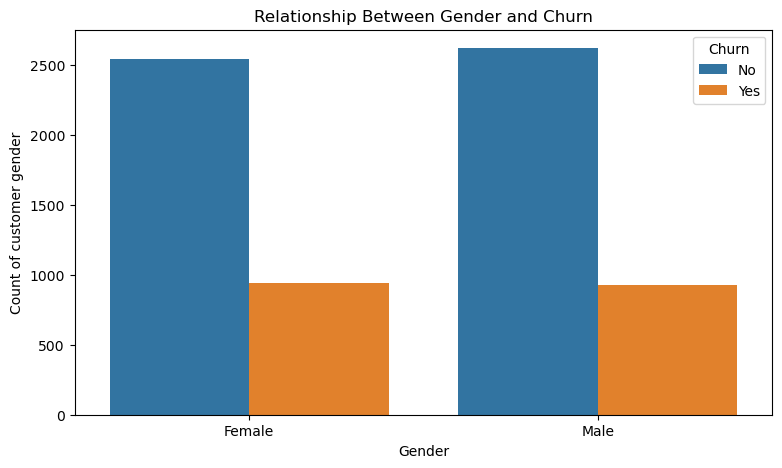

In [150]:
# Investigating gender and the target Churn

plt.figure(figsize = (9, 5))
plt.title("Relationship Between Gender and Churn")
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.xlabel('Gender')
plt.ylabel('Count of customer gender');

#### Observation
From the plot above, majority of the customers both the male and the female haven't churned but there is also a significant percentage of both gender churning.

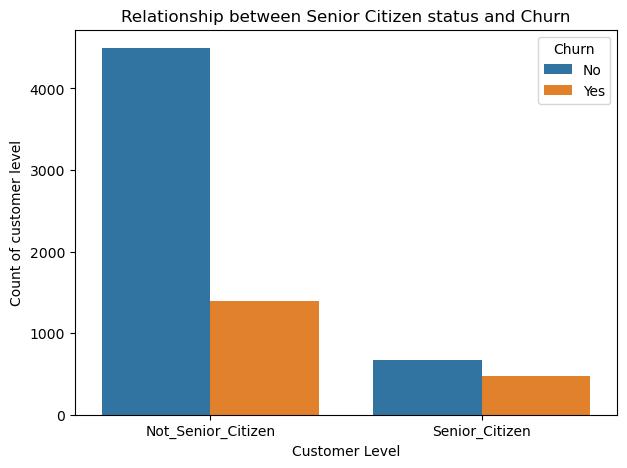

In [152]:
# Relationship between Senior Citizen status and Churn

plt.figure(figsize = (7, 5))
plt.title("Relationship between Senior Citizen status and Churn")
sns.countplot(x = 'Senior_Citizen', data = df, hue = 'Churn')
plt.xlabel('Customer Level')
plt.ylabel('Count of customer level');

#### Observation
 It's evident from the chart above that Senior Citizens exhibit a lower churn rate compared to Non Senior citizens.

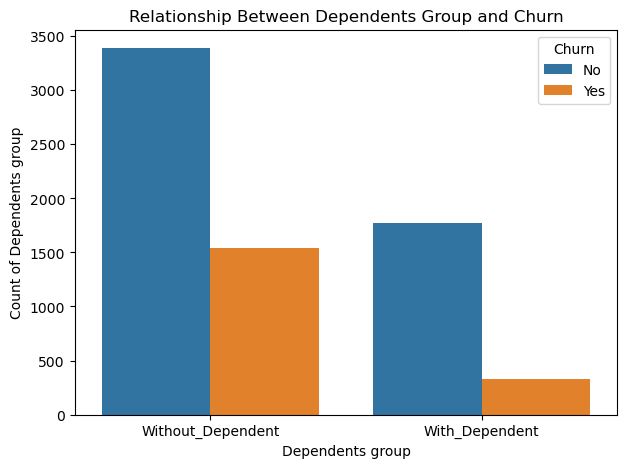

In [153]:
# Relationship Between Dependents Group and Churn

plt.figure(figsize = (7, 5))
plt.title("Relationship Between Dependents Group and Churn")
sns.countplot(x = 'Dependents_group', data = df, hue = 'Churn')
plt.xlabel('Dependents group')
plt.ylabel('Count of Dependents group');

#### Observation
The bar chart examines the relationship between the presence of dependents and customer churn. The results indicate that customers without dependents have a higher churn rate compared to those with dependents.

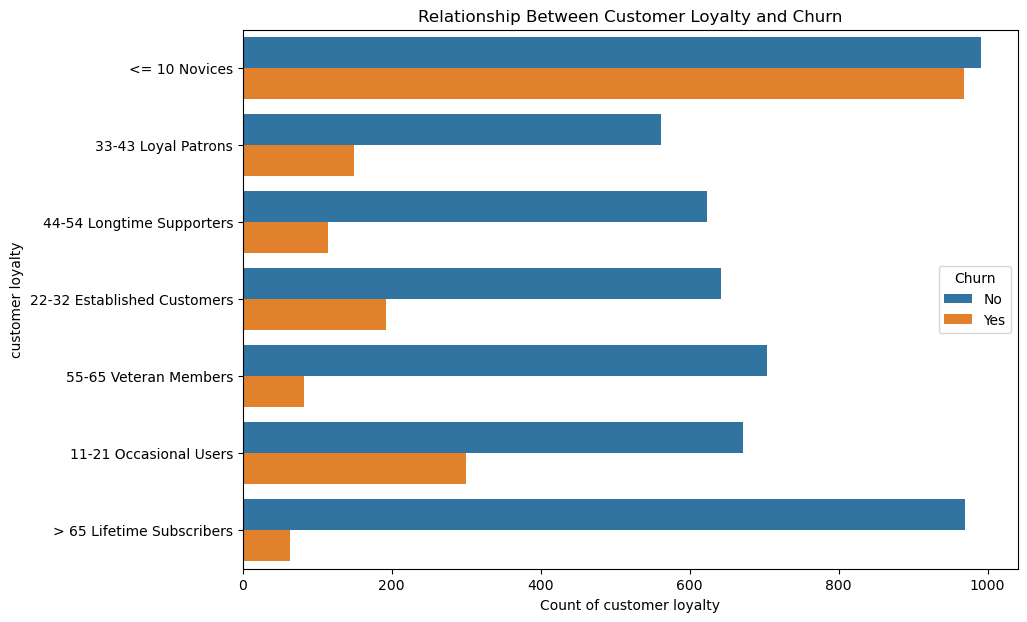

In [154]:
# Investigating customer loyalty and the target Churn

plt.figure(figsize = (10, 7))
plt.title("Relationship Between Customer Loyalty and Churn")
sns.countplot(y = 'customer_loyalty', data = df, hue = 'Churn')
plt.ylabel('customer loyalty')
plt.xlabel('Count of customer loyalty');

#### Observation
The plot explores the association between customer loyalty, categorized into different groups, and customer churn. Notably, customers classified as "Novice," who have been with the company for less than 11 months, exhibit a higher churn rate compared to other customer loyalty groups. In contrast, the oldest subscribers display relatively low churn rates, indicating that longer tenure often leads to greater customer loyalty and a reduced likelihood of churning.

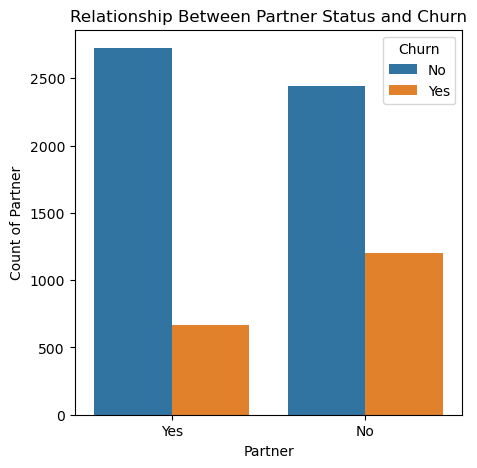

In [156]:
# Investigating customer with and without partner and the target Churn

plt.figure(figsize = (5, 5))
plt.title("Relationship Between Partner Status and Churn")
sns.countplot(x = 'Partner', data = df, hue = 'Churn')
plt.xlabel('Partner')
plt.ylabel('Count of Partner');

#### Observation
Customers without partners exhibit a higher churn rate in terms of proportion. This suggests that individuals without partners are more likely to churn compared to those with partners.

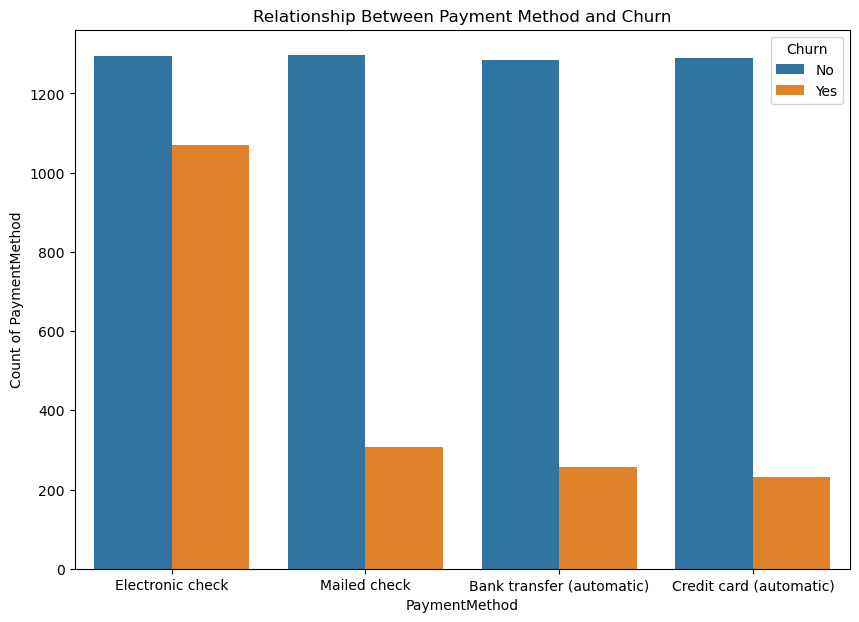

In [161]:
# Investigating Payment Method and the target Churn

plt.figure(figsize = (10, 7))
plt.title("Relationship Between Payment Method and Churn")
sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Count of PaymentMethod');

#### Observation
A notable observation is that the majority of customers using the "Electronic Check" payment method exhibit a higher churn rate. This suggests that there might be specific issues or concerns associated with this payment method that could be contributing to higher customer attrition. Investigating the reasons behind this trend could be valuable for the company.

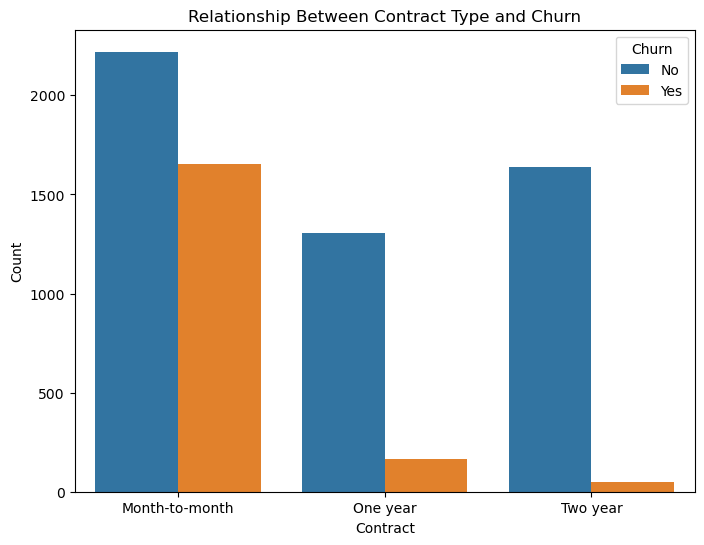

In [162]:
# Investigating Contract and the target Churn

plt.figure(figsize = (8, 6))
plt.title("Relationship Between Contract Type and Churn")
sns.countplot(x = 'Contract', data = df, hue = 'Churn')
plt.xlabel('Contract')
plt.ylabel('Count');

#### Observation
Majority of customers on a "Monthly" subscription exhibit a higher churn rate. In contrast, customers on longer-term contracts (e.g., yearly) display relatively lower churn rates.

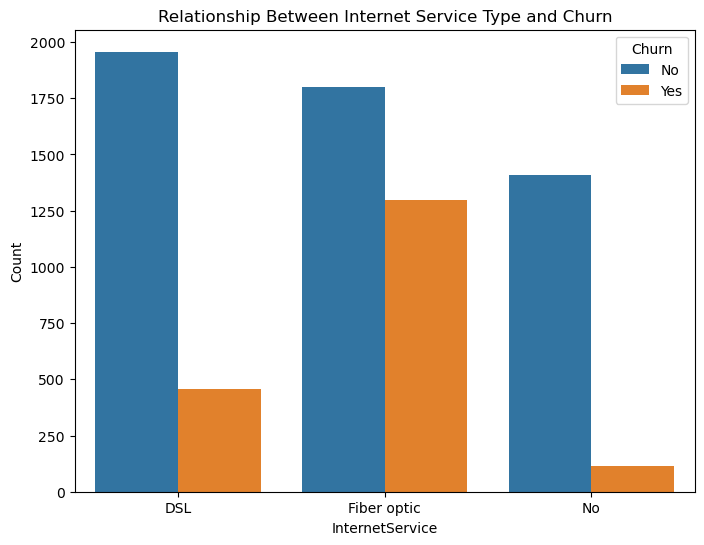

In [163]:
# Investigating Internet Service and the target Churn

plt.figure(figsize = (8, 6))
plt.title("Relationship Between Internet Service Type and Churn")
sns.countplot(x = 'InternetService', data = df, hue = 'Churn')
plt.xlabel('InternetService')
plt.ylabel('Count');

#### Observation
Notably, subscribers using "Fiber optic" internet service have a higher churn rate compared to those with "DSL" service. Additionally, customers with no internet service exhibit relatively low churn rates. This suggests that the type of internet service may impact churn, with "Fiber optic" subscribers being more likely to churn compared to other categories.

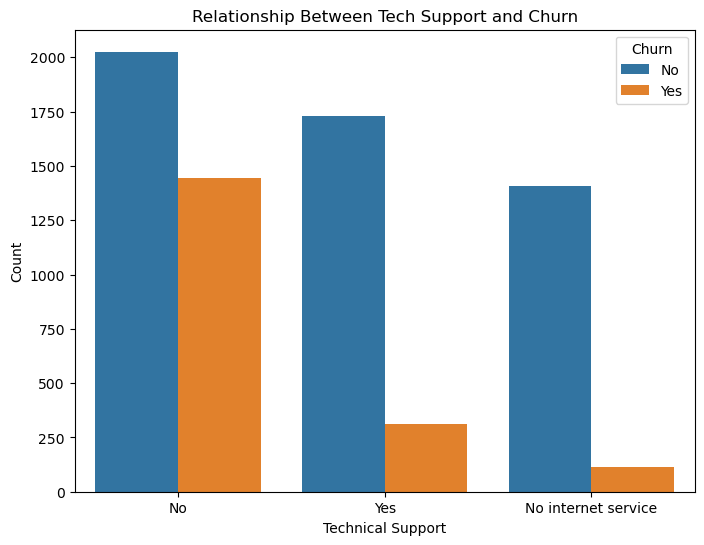

In [165]:
# Investigating Tech Support and the target Churn

plt.figure(figsize = (8, 6))
plt.title("Relationship Between Tech Support and Churn")
sns.countplot(x = 'TechSupport', data = df, hue = 'Churn')
plt.xlabel('Technical Support')
plt.ylabel('Count');

#### Observation
Significantly, customers without tech support exhibit a higher churn rate, while customers with tech support and those without internet service display relatively lower churn rates.

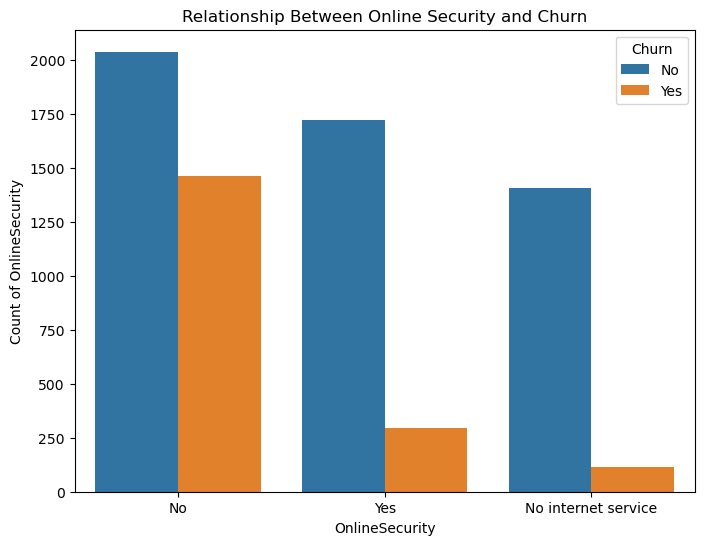

In [167]:
# Investigating Online Security and the target which is Churn

plt.figure(figsize = (8, 6))
plt.title("Relationship Between Online Security and Churn")
sns.countplot(x = 'OnlineSecurity', data = df, hue = 'Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count of OnlineSecurity');

#### Observation
Customers without online security services have a higher churn rate, while customers with online security and those without internet service exhibit relatively lower churn rates. This indicates that the presence of online security services may contribute to reducing churn, as customers with such services are less likely to discontinue their subscriptions.

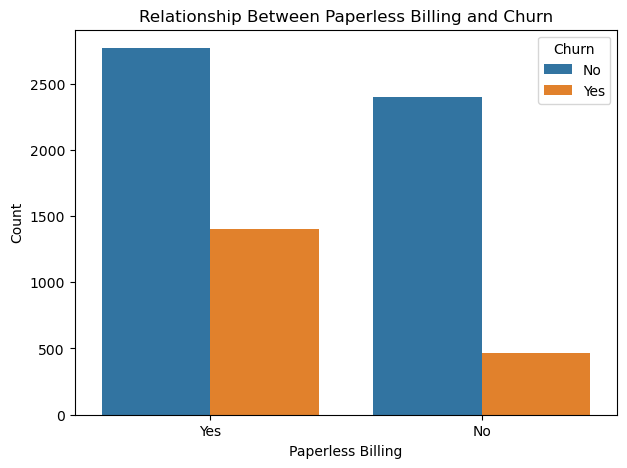

In [169]:
# Investigating PaperlessBilling and the target Churn

plt.figure(figsize = (7, 5))
plt.title("Relationship Between Paperless Billing and Churn")
sns.countplot(x = 'PaperlessBilling', data = df, hue = 'Churn')
plt.xlabel('Paperless Billing')
plt.ylabel('Count');

#### Observation
Notably, approximately half of customers with paperless billings exhibit a higher churn rate, whereas customers who do not opt for paperless billing show relatively lower churn rates.

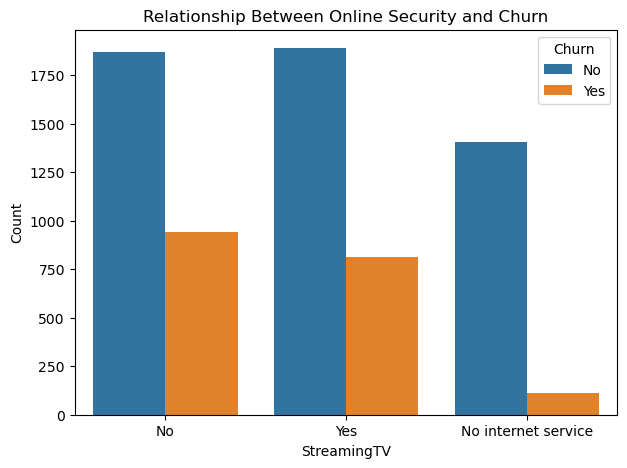

In [170]:
# Investigating StreamingTV and the target Churn

plt.figure(figsize = (7, 5))
plt.title("Relationship Between Online Security and Churn")
sns.countplot(x = 'StreamingTV', data = df, hue = 'Churn')
plt.xlabel('StreamingTV')
plt.ylabel('Count');

#### Observation
Remarkably, nearly half of customers with both streaming TV and no streaming TV service exhibit similar, higher churn rates. In contrast, customers with no internet service experience relatively lower churn rates.

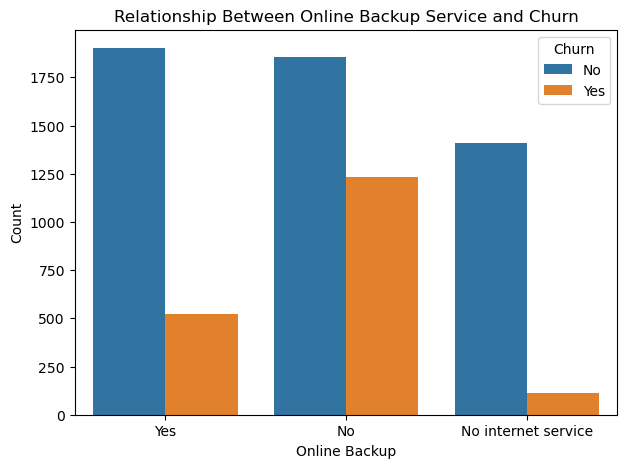

In [171]:
# Investigating OnlineBackup and the target Churn

plt.figure(figsize = (7, 5))
plt.title("Relationship Between Online Backup Service and Churn")
sns.countplot(x = 'OnlineBackup', data = df, hue = 'Churn')
plt.xlabel('Online Backup')
plt.ylabel('Count');

#### Observation
Significantly, the majority of customers without online backup services exhibit the highest churn rate, followed by customers with online backup services. In contrast, customers with no internet service have relatively lower churn rates.

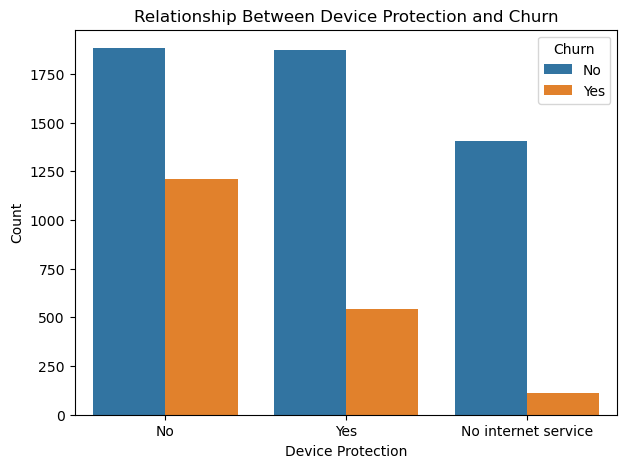

In [172]:
# Investigating DeviceProtection group and the target Churn

plt.figure(figsize = (7, 5))
plt.title("Relationship Between Device Protection and Churn")
sns.countplot(x = 'DeviceProtection', data = df, hue = 'Churn')
plt.xlabel('Device Protection')
plt.ylabel('Count');

#### Observation

Majority of customers without device protection services exhibit the highest churn rate, followed by customers with device protection. In contrast, customers with no internet service have relatively lower churn rates.

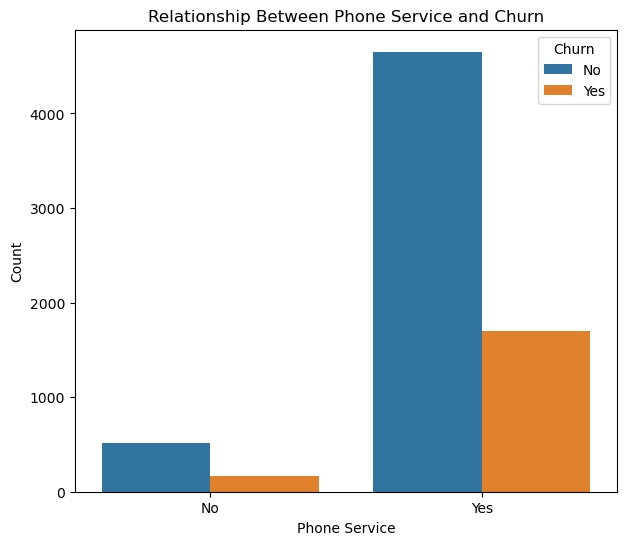

In [173]:
# Investigating Phone Service and the target which is Churn

plt.figure(figsize = (7, 6))
plt.title("Relationship Between Phone Service and Churn")
sns.countplot(x = 'PhoneService', data = df, hue = 'Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count');

#### Observation
The plot shows that a significant percentage of customers with phone service experience churn. In contrast, customers without phone service exhibit relatively lower churn rates. 

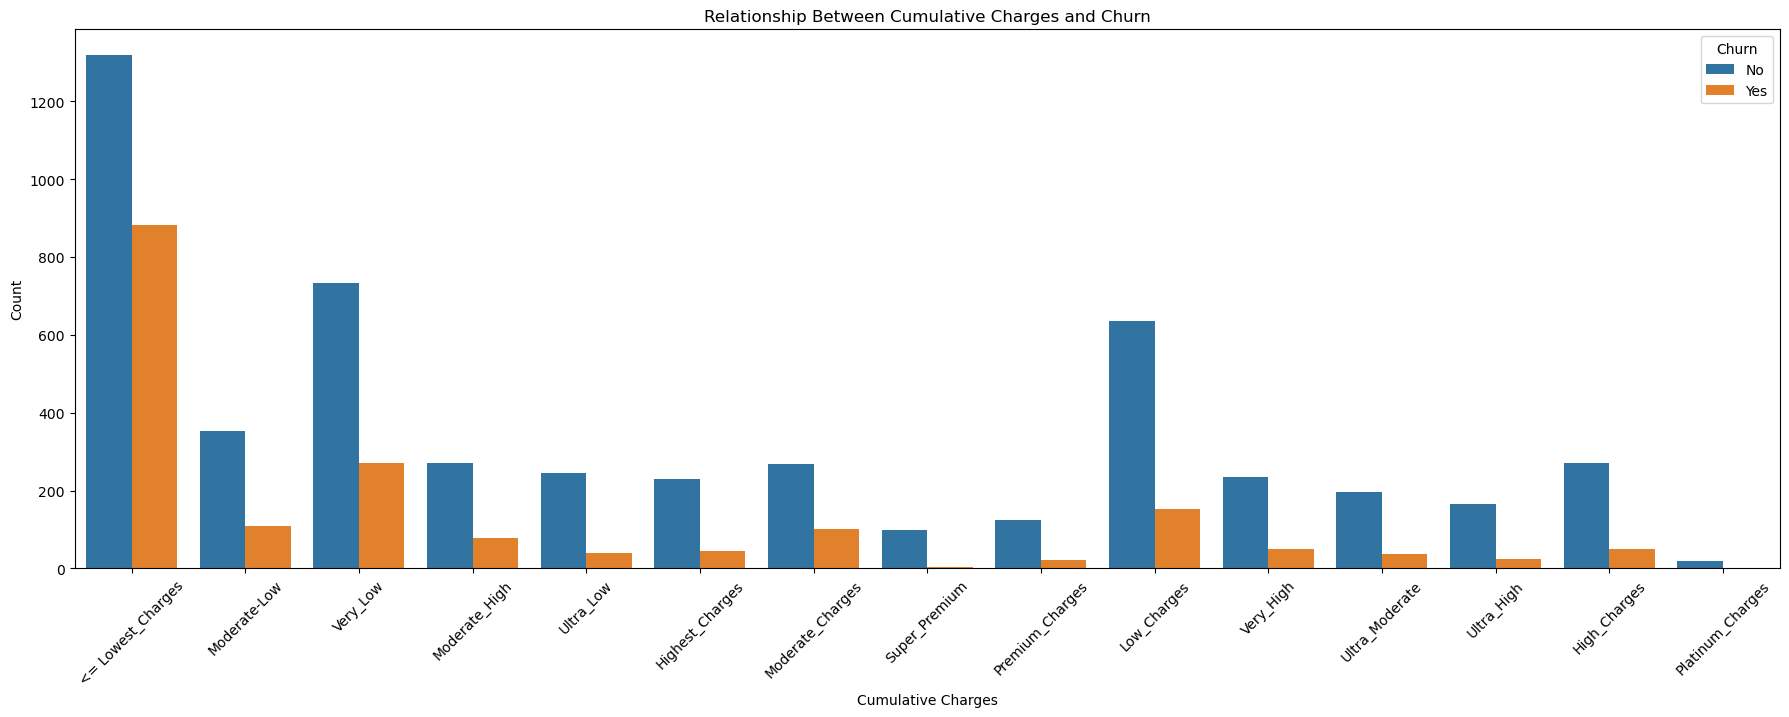

In [174]:
# Investigating cumulative charges and the target Churn

plt.figure(figsize = (22, 7))
plt.title("Relationship Between Cumulative Charges and Churn")
sns.countplot(x = 'Cumulative_Charges', data = df, hue = 'Churn')
plt.xlabel('Cumulative Charges')
plt.xticks(rotation = 45)
plt.ylabel('Count');

#### Observation
Customers with the lowest cumulative charges in the range of "0-600" tend to churn and cancel the service more frequently compared to other subscriber groups. This suggests that customers with lower cumulative charges may be more price-sensitive or dissatisfied with their service, leading to a higher churn rate.

### Multivariate Analysis

In [40]:
df2 = df.copy()

In [41]:
df2 = df2.drop(['Senior_Citizen', 'Dependents_group', 'customer_loyalty', 'label', 'customerID', 'Cumulative_Charges'], axis = 1)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [43]:
encoder = LabelEncoder()

In [44]:
for c in df2.columns:
    if (df2[c].dtype == 'object'):
        df2[c] = encoder.fit_transform(df2[c])
    else:
        df2[c] = df2[c]
        
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


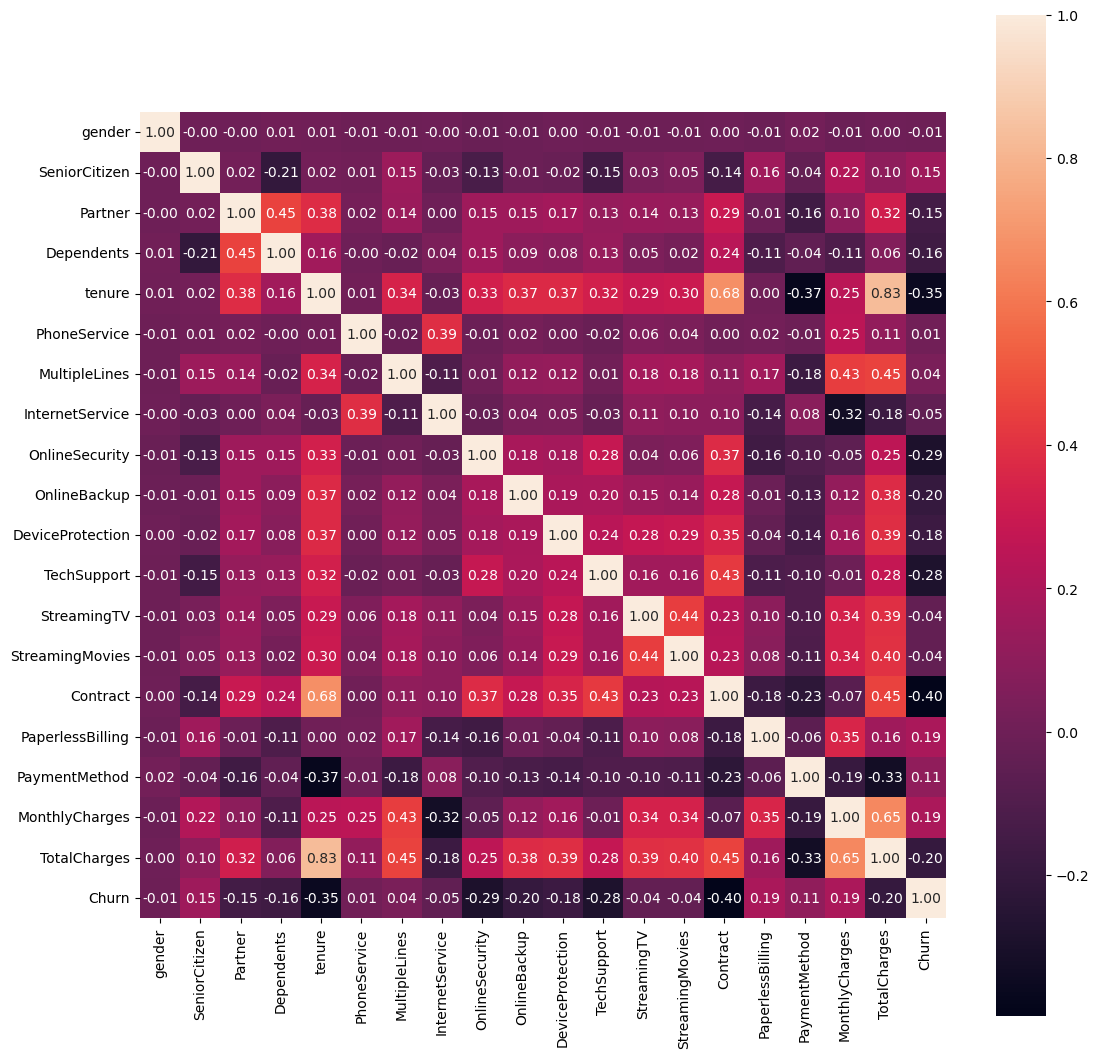

In [45]:
# Correlation between the target varibale "Churn" and other variables.

plt.figure(figsize = (13, 13))

hm = sns.heatmap(df2.corr(), cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10})

#### Observations
. From the correlation heatmap above, customers with longer-term contracts (i.e one-year or two-year contracts) are less likely     to leave or switch to another service provider compared to customers with month-to-month contracts.

. The weak negative correlation between "tenure" and "churn" indicates that customers who have been with the telecom company for     a longer period are less likely to churn or cancel their services.

. The weak negative correlation between "total charges" and "churn" suggests that customers who have spent more money on telecom      services (higher total charges) are less likely to churn.

. The weak negative correlation between "tech support" and "churn" suggests that customers who have access to tech support           services are less likely to churn. People with no technical support churn the more as seen from the bivariate analysis.

. Similar to technical support, the weak negative correlation between "Online security" and "churn" indicates that customers who     have online security services are less likely to churn. Having online security features in their subscription may make           customers feel more secure and less prone to switching to another provider that may not offer similar security features.

# Machine Learning

In [47]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [128]:
#target = df2[['Churn']]

#target

In [49]:
df2.drop(['Churn'], axis = 1, inplace = True)

In [124]:
#df2.dtypes

In [125]:
#target.dtypes

In [52]:
# splitting the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size = 0.2, random_state = 42)

In [53]:
# setting up the scaler

scaler = MinMaxScaler()

# fitting the scaler to the training set to learn the parameters

scaler.fit(X_train)

# transform the train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# transforming the returned Numpy array into a dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# rounding the scaled training to set reduce the number of decimals just to confirm that we now have a min value of 0 and max value of 1

#np.round(X_train_scaled.describe(), 1)

In [55]:
X_train_scaled.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,0.0,0.591549,0.0,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.306468,0.237406
1,1.0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.349751,0.019600


In [56]:
X_test_scaled.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,1.0,1.0,0.0,0.845070,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.067164,0.171118
1,0.0,0.0,0.0,0.0,0.253521,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.064179,0.051581


In [57]:
# Model building

# Instantiating the classifiers models

lr_mod = LogisticRegression()
rf_mod = RandomForestClassifier()
dt_mod = DecisionTreeClassifier()
gb_mod = GaussianNB()

# Fitting and training the models

lr_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
dt_mod.fit(X_train, y_train)
gb_mod.fit(X_train, y_train)

GaussianNB()

In [58]:
# Creating a prediction profile for the models

lr_pred = lr_mod.predict(X_test)
rf_pred = rf_mod.predict(X_test)
dt_pred = dt_mod.predict(X_test)
gb_pred = gb_mod.predict(X_test)

In [59]:
# Evaluation metric for Logistic Regression
print('Logistic Regression')

print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Precision:', precision_score(y_test, lr_pred))
print('Recall:', recall_score(y_test, lr_pred))
print('F1-score:', f1_score(y_test, lr_pred))
print('AUC-ROC:', roc_auc_score(y_test, lr_pred))

Logistic Regression
Accuracy: 0.7839374555792467
Precision: 0.6114649681528662
Recall: 0.5133689839572193
F1-score: 0.5581395348837209
AUC-ROC: 0.6976331851054248


In [60]:
# Evaluation metric for Random Forest Classifier
print('Random Forest Classifier')

print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Precision:', precision_score(y_test, rf_pred))
print('Recall:', recall_score(y_test, rf_pred))
print('F1-score:', f1_score(y_test, rf_pred))
print('AUC-ROC:', roc_auc_score(y_test, rf_pred))

Random Forest Classifier
Accuracy: 0.7874911158493249
Precision: 0.6344086021505376
Recall: 0.4732620320855615
F1-score: 0.5421133231240428
AUC-ROC: 0.6872602512799539


In [61]:
# Evaluation metric for Decision Tree Classifier
print('Decision Tree Classifier')

print('Accuracy:', accuracy_score(y_test, dt_pred))
print('Precision:', precision_score(y_test, dt_pred))
print('Recall:', recall_score(y_test, dt_pred))
print('F1-score:', f1_score(y_test, dt_pred))
print('AUC-ROC:', roc_auc_score(y_test, dt_pred))

Decision Tree Classifier
Accuracy: 0.7235252309879175
Precision: 0.48166259168704156
Recall: 0.5267379679144385
F1-score: 0.5031928480204342
AUC-ROC: 0.6607552375874226


In [62]:
# Evaluation metric for Naive Bayes
print('Naive Bayes')

print('Accuracy:', accuracy_score(y_test, gb_pred))
print('Precision:', precision_score(y_test, gb_pred))
print('Recall:', recall_score(y_test, gb_pred))
print('F1-score:', f1_score(y_test, gb_pred))
print('AUC-ROC:', roc_auc_score(y_test, gb_pred))

Naive Bayes
Accuracy: 0.7391613361762616
Precision: 0.5064935064935064
Recall: 0.7299465240641712
F1-score: 0.5980284775465498
AUC-ROC: 0.7362220519643217


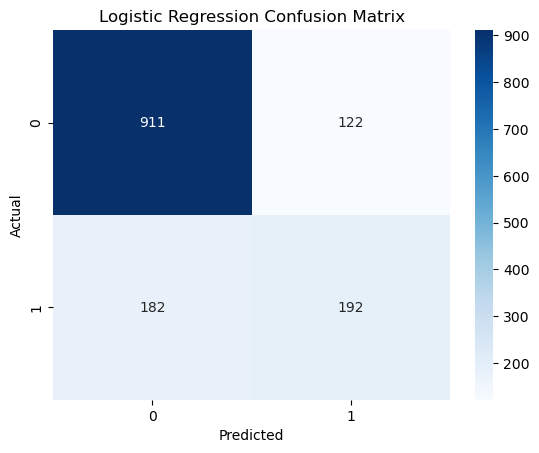

In [63]:
# Confusion Matrix for Logistic Regression

lcm = confusion_matrix(y_test, lr_pred)

# visualizing the confusion matrix

sns.heatmap(lcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

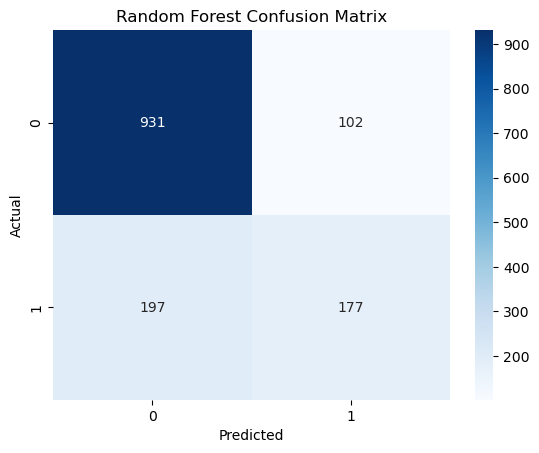

In [64]:
# Confusion Matrix for Random Forest Classifier

rcm = confusion_matrix(y_test, rf_pred)

# visualizing the confusion matrix

sns.heatmap(rcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

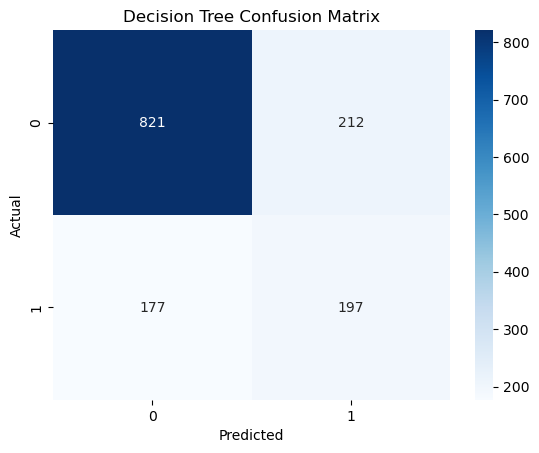

In [65]:
# Confusion Matrix for Decision Tree Classifier

dcm = confusion_matrix(y_test, dt_pred)

# visualizing the confusion matrix

sns.heatmap(dcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

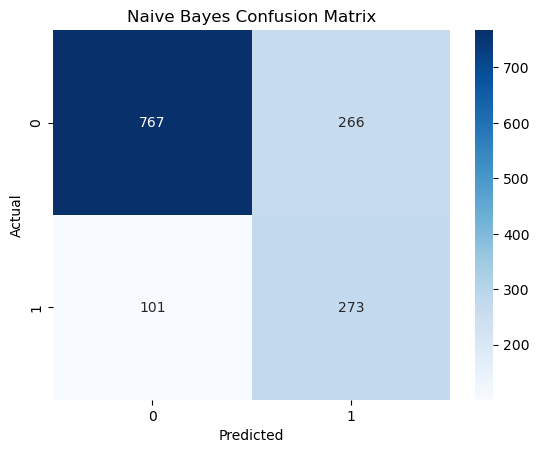

In [66]:
# Confusion Matrix for Naive Bayes

gcm = confusion_matrix(y_test, gb_pred)

# visualizing the confusion matrix

sns.heatmap(gcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

#### Observation
If the business is more concerned with minimizing customer churn at all costs and is willing to invest resources in retaining customers, then it should prioritize better results on true positives. In this case, recall becomes a crucial metric because it measures the ability of the model to correctly identify churners. The Naive Bayes model has the highest recall (73%), making it a strong choice if reducing false negatives is a priority.

## Model Improvement

In [116]:
# Improving the models by using one hot encoding for the independent features and label encoder for just the dependent variable.
# Also, scaling just three of the independent features which are "tenure", "Monthly Charges" and "Total Charges" using "MinMax Scaler".

In [117]:
#data = df.copy()
#data.info()

In [88]:
#data = data.drop(['Senior_Citizen', 'Dependents_group', 'customer_loyalty', 'label', 'customerID', 'Cumulative_Charges'], axis = 1)

In [90]:
#data = data.drop(['Churn'], axis = 1)

In [92]:
#data.info()

In [183]:
#label = target.copy()
#label

In [95]:
data = pd.get_dummies(data, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = False)

data.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [96]:
scaler = MinMaxScaler()

data['scaled_tenure'] = scaler.fit_transform(data['tenure'].values.reshape(-1, 1))
data['scaled_MCharges'] = scaler.fit_transform(data['MonthlyCharges'].values.reshape(-1, 1))
data['scaled_TCharges'] = scaler.fit_transform(data['TotalCharges'].values.reshape(-1, 1))

data.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)

data.head(2)

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,scaled_tenure,scaled_MCharges,scaled_TCharges
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0.000000,0.115423,0.001275
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0.464789,0.385075,0.215867


In [97]:
# splitting the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [101]:
#X_train

In [100]:
#y_train

In [111]:
# Model building

# Instantiating the classifiers models

lr_mod = LogisticRegression()
rf_mod = RandomForestClassifier()
dt_mod = DecisionTreeClassifier()
gb_mod = GaussianNB()

# Fitting and training the models

lr_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
dt_mod.fit(X_train, y_train)
gb_mod.fit(X_train, y_train)

GaussianNB()

In [112]:
# Creating a prediction profile for the models

lr_pred = lr_mod.predict(X_test)
rf_pred = rf_mod.predict(X_test)
dt_pred = dt_mod.predict(X_test)
gb_pred = gb_mod.predict(X_test)

In [113]:
# Evaluation metric for Naive Bayes
print('Naive Bayes')

print('Accuracy:', accuracy_score(y_test, gb_pred))
print('Precision:', precision_score(y_test, gb_pred))
print('Recall:', recall_score(y_test, gb_pred))
print('F1-score:', f1_score(y_test, gb_pred))
print('AUC-ROC:', roc_auc_score(y_test, gb_pred))

Naive Bayes
Accuracy: 0.6837242359630419
Precision: 0.44935805991440797
Recall: 0.8422459893048129
F1-score: 0.5860465116279069
AUC-ROC: 0.7342885319224934


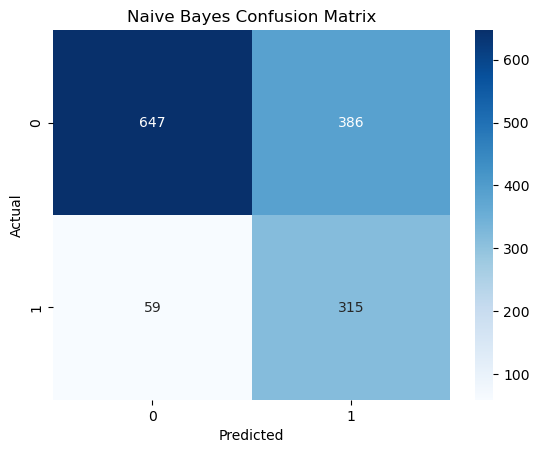

In [114]:
# Confusion Matrix for Naive Bayes

nbcm = confusion_matrix(y_test, gb_pred)

# visualizing the confusion matrix

sns.heatmap(nbcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

#### Observation

After adjustment of the feature engineering, one of the significant improvements in the "Naive Bayes" model is in recall. Recall increased substantially from (73% to 84%). This suggests that the model is now better at identifying actual positive cases (customers who churned). It has reduced the number of false negatives, which is often crucial in customer churn prediction.

In [102]:
# Deploying 8 Machine Learning Algorithims

classifiers = [[XGBClassifier(), 'XGB Classfier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classfier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [104]:
#classifiers

In [123]:
# Evaluation Metrics

acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    acc_score = accuracy_score(y_test, pred)
    pre_score = precision_score(y_test, pred)
    re_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(acc_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(pre_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(re_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [106]:
print('Accuracy score')

acc = pd.DataFrame(acc_list)
acc.head()

Accuracy score


,XGB Classfier,Random Forest,K-Nearest Neighbors,SGD Classfier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,76.55%,78.11%,74.27%,77.19%,78.54%,68.37%,72.0%,78.75%


In [107]:
print('Recall score')

re = pd.DataFrame(recall_list)
re.head()

Recall score


,XGB Classfier,Random Forest,K-Nearest Neighbors,SGD Classfier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,48.66%,46.26%,51.07%,27.01%,48.13%,84.22%,50.53%,51.34%


In [108]:
print('Precision score')

pre = pd.DataFrame(precision_list)
pre.head()

Precision score


,XGB Classfier,Random Forest,K-Nearest Neighbors,SGD Classfier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,56.88%,61.79%,51.62%,67.79%,62.5%,44.94%,47.49%,62.14%


In [109]:
print('ROC_AUC score')

roc = pd.DataFrame(roc_list)
roc.head()

ROC_AUC score


,XGB Classfier,Random Forest,K-Nearest Neighbors,SGD Classfier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,67.65%,67.95%,66.87%,61.18%,68.84%,73.43%,65.15%,70.01%


#### Observations
These are the results gotten after deployment of 8 Models. Focusing on "Recall" which measures the ability of the model to correctly predict the actual number of customers that churn, the Naive Bayes model showed a significant improvement in this regard with a significant increase in recall.

## Analyzing the Results of the Trained Models

The models evaluated showed variations in performance metrics. The Naive Bayes model, after adjustments, demonstrated a strong ability to identify customers likely to churn (high recall) while maintaining reasonable precision. This balance aligns with the goal of predicting customer churn.



## What Metrics are Most Important for the Problem? Should the Business be More Concerned with Better Results on False Negatives or True Positives?

. In the context of predicting customer churn for CONNECTTEL, the business should prioritize better results on true positives     (customers correctly identified as churners).

. Reducing false negatives (customers who churn but are not identified) is crucial because it allows the business to take         proactive retention measures for at-risk customers.

. While maintaining reasonable precision is important to avoid unnecessary retention efforts, prioritizing recall (true           positives) ensures that the business captures as many potential churners as possible.

Based on these considerations, the business should be more concerned with improving results on true positives (recall) to effectively address customer churn in the telecommunications industry.

## Recommendations

. Personalized Retention Strategies: Develop personalized retention strategies based on the churn prediction model's insights.     Tailor offers, incentives, and communication to specific customer segments identified as at-risk of churning.

. Proactive Customer Support: Implement proactive customer support initiatives for customers with a high likelihood of churning.   Identify pain points in their experience and address them promptly to improve satisfaction.

. Feedback Mechanism: Establish a feedback mechanism to collect customer feedback on service quality and reasons for potential     churn. Use this feedback to make product and service improvements.

. Competitive Pricing and Packages: Continuously assess the competitiveness of pricing and service packages in the market.         Adjust offerings to remain attractive to customers while maintaining profitability.